## Exploratory Data Analysis

1. [Load data](#load-data)
2. [Data counts](#1-data-counts)
3. [Missing values](#2-missing-values)
4. [Check client's age](#3-check-clients-age)
5. [Explore features](#4-explore-features)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) 

import numpy as np

import seaborn as sns
sns.set_theme()

### Load data

In [2]:
dmo = pd.read_csv("../data/dmo.csv", sep = ';')
dmo.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,0,51,7,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN,1678.946429,1318.698214,25.0,23.0,1891.353214,1335.619643,250.000000,283.089286,247.607143,50.0,30.0,3.0,12.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,2,1,43,152,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN,708.129643,704.935714,4.0,3.0,386.442857,386.442857,307.142857,38.407143,35.714286,6.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,1,17,140,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN,1607.149643,1607.149643,4.0,4.0,123.750000,123.750000,0.000000,112.857143,10.678571,3.0,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,24,153,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN,1872.483571,1822.589643,9.0,4.0,3614.747500,3598.950357,714.285714,526.037500,1963.165357,41.0,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,58,200,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN,4372.773929,2964.290357,23.0,14.0,5868.460714,4031.925000,157.142857,832.175000,1779.571429,44.0,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Data counts

- 1,615 clients with "social-demographical" and "products owned + actual volumes" data
- 1,587 clients with "inflow/outflow" data
- 969 clients with "Sales and Revenues" data
- Missing values have been replaced with 'NaN'.

### 2. Missing values

In [3]:
dmo.isna().sum()

Client                             0
Sex                                0
Age                                0
Tenure                             0
Count_CA                           0
Count_SA                        1189
Count_MF                        1309
Count_OVD                       1196
Count_CC                        1445
Count_CL                        1480
ActBal_CA                          0
ActBal_SA                       1189
ActBal_MF                       1309
ActBal_OVD                      1196
ActBal_CC                       1445
ActBal_CL                       1480
VolumeCred                        28
VolumeCred_CA                     28
TransactionsCred                  28
TransactionsCred_CA               28
VolumeDeb                         28
VolumeDeb_CA                      28
VolumeDebCash_Card                28
VolumeDebCashless_Card            28
VolumeDeb_PaymentOrder            28
TransactionsDeb                   28
TransactionsDeb_CA                28
T

1. 28 clients are missing "inflow/outflow" data => their accounts aren't active => assign '0'
2. The same assumption applies for the clients with missingness for the current and saving accounts, mutual funds, overdrafts, credit card and loans => assign 0
3. 646 clients with missing sale and revenue values will be considered as test set

In [4]:
# Separate features to replace NaN with zeros
soc_dem = ['Sex', 'Age', 'Tenure']

products_act_bal = ['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA',\
                       'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']

inflow_outflow = ['VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',\
                  'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',\
                  'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card',\
                  'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']

sales = ['Sale_MF', 'Sale_CC', 'Sale_CL']
revenue = ['Revenue_MF', 'Revenue_CC', 'Revenue_CL']

In [5]:
dmo[products_act_bal] = dmo[products_act_bal].fillna(0)
dmo[inflow_outflow] = dmo[inflow_outflow].fillna(0)
dmo.isna().sum()

Client                            0
Sex                               0
Age                               0
Tenure                            0
Count_CA                          0
Count_SA                          0
Count_MF                          0
Count_OVD                         0
Count_CC                          0
Count_CL                          0
ActBal_CA                         0
ActBal_SA                         0
ActBal_MF                         0
ActBal_OVD                        0
ActBal_CC                         0
ActBal_CL                         0
VolumeCred                        0
VolumeCred_CA                     0
TransactionsCred                  0
TransactionsCred_CA               0
VolumeDeb                         0
VolumeDeb_CA                      0
VolumeDebCash_Card                0
VolumeDebCashless_Card            0
VolumeDeb_PaymentOrder            0
TransactionsDeb                   0
TransactionsDeb_CA                0
TransactionsDebCash_Card    

In [6]:
dmo.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,0,51,7,1,0.0,0.0,1.0,0.0,0.0,1333.802857,0.000000,0.000000,0.0,0.000000,0.0,1678.946429,1318.698214,25.0,23.0,1891.353214,1335.619643,250.000000,283.089286,247.607143,50.0,30.0,3.0,12.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,2,1,43,152,1,1.0,0.0,0.0,0.0,0.0,110.768571,13326.190357,0.000000,0.0,0.000000,0.0,708.129643,704.935714,4.0,3.0,386.442857,386.442857,307.142857,38.407143,35.714286,6.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,1,17,140,1,0.0,1.0,0.0,0.0,0.0,482.654643,0.000000,107.251786,0.0,0.000000,0.0,1607.149643,1607.149643,4.0,4.0,123.750000,123.750000,0.000000,112.857143,10.678571,3.0,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,24,153,1,1.0,0.0,0.0,1.0,0.0,1599.840714,76.437143,0.000000,0.0,1110.381786,0.0,1872.483571,1822.589643,9.0,4.0,3614.747500,3598.950357,714.285714,526.037500,1963.165357,41.0,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,58,200,1,1.0,0.0,0.0,0.0,0.0,5353.483929,8079.715714,0.000000,0.0,0.000000,0.0,4372.773929,2964.290357,23.0,14.0,5868.460714,4031.925000,157.142857,832.175000,1779.571429,44.0,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Check clients' age

1. Check if all clients are eligible to take a loan or posses a credit card
2. Check if the tenure < actual age

In [7]:
# To be eligible for a loan in Germany, a client must meet be at least 18 years old

print("{0:.0%} clients are under 18".format(len(dmo['Age'][dmo['Age'] < 18]) / dmo.shape[0]))

6% clients are under 18


Persons under 18 years old can be clients of the bank but they cannot posses some products. Therefore, we cannot take them into account for building the models. Thefore, these clients will be excluded from the further analysis.

In [8]:
dmo_18plus = dmo.loc[(dmo["Age"] > 18)]
dmo_18plus.shape

(1506, 36)

In [9]:
# Check clients who have a tenure higher than their age
print("{0:.0%} of all clients have a tenure higher than their Age".format(len(dmo[dmo['Age'] < dmo['Tenure']/12])/ dmo.shape[0]))
print("{0:.0%} of clients over 18 have a tenure higher than their Age".format(len(dmo_18plus[dmo_18plus['Age'] < dmo_18plus['Tenure']/12])/ dmo_18plus.shape[0]))


3% of all clients have a tenure higher than their Age
0% of clients over 18 have a tenure higher than their Age


After excluding the clients under 18, no abnormalities in age/tenure were found. If we wanted to proceed with the initial data, we would impute the data. For the sake of time, we will proceed with reduced data, i.e. 18+ clients.

In [10]:
dmo = dmo_18plus

### 4. Explore features

#### 4.1 Inflow/Outflow features

<AxesSubplot:>

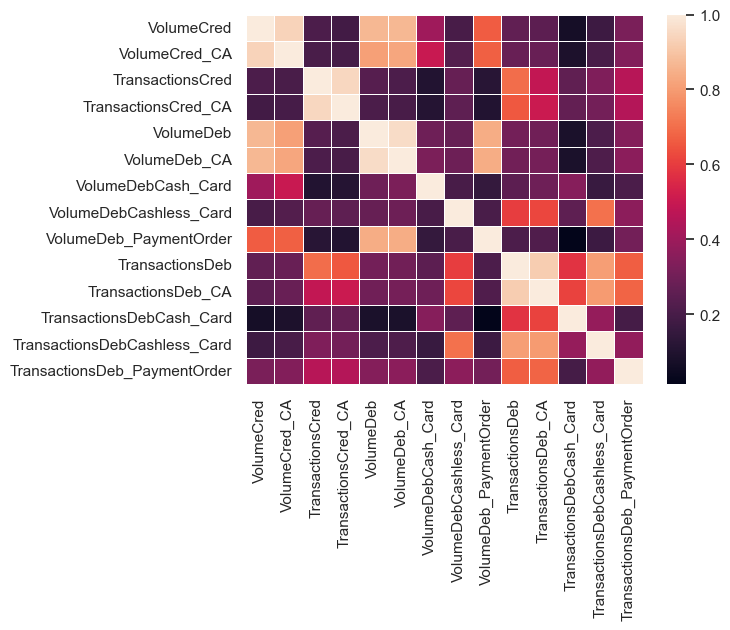

In [11]:
sns.heatmap(dmo[inflow_outflow].corr(), annot=False, linewidth=.5)

There's a strong correlation (> 0.9) between the following feature pairs: 
- (TransactionsCred, TransactionsCred_SA)
- (VolumeCred, VolumeCred_CA)
- (VolumeDeb, VolumeDeb_CA)
- (TransactionsDeb, TransactionsDeb_CA)

From the data description, there is a linear relation (or causality) between the feature pairs: the first feature (i.e total volume) of each pair is the sum of the second (i.e by current account) and other features (i.e. by cash card, cashless card and payment order).

The following features will be removed, as they provide no additional information:
- VolumeCred
- VolumeDeb
- TransactionsCred 
- TransactionsDeb

In [12]:
# Update the list of selected inflow/outflow features
inflow_outflow = ['VolumeCred_CA', 'TransactionsCred_CA', 'VolumeDeb_CA', 'VolumeDebCash_Card',
                  'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA',
                  'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']

<AxesSubplot:>

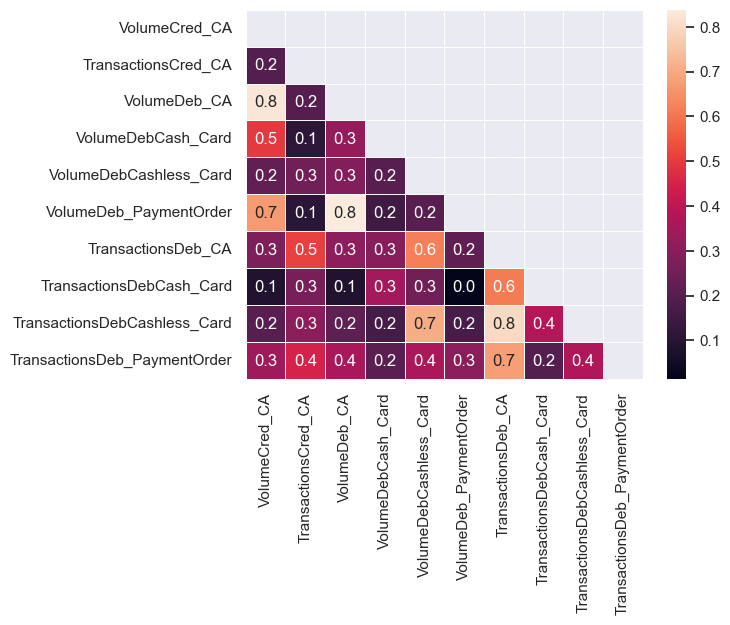

In [13]:
dmo_cor = dmo[inflow_outflow].corr()

mask = np.triu(np.ones_like(dmo_cor))

sns.heatmap(dmo_cor, annot=True, fmt='.1f', linewidth=.5, mask=mask)

- VolumeCred_CA and VolumeDeb_CA are strongly correlated (0.8). 
This suggests a linear relationship which can be explained by the fact that the higher the volume of credits received by a client in their current account, the higher the volume of debits they is likely to make. 

- TransactionsDebCashless_Card and TransactionsDeb_CA have a correlation of 0.8. 
This is likely because the majority of debit transactions on current account are cashless debits via card.

Although there is a strong correlation, there is a causal relation between these variables. Therefore, 

1. A new feature which describes the cash flow of the current account will be created: 
    flow_CA = VolumeCred_CA - VolumeDeb_CA 
2. Remove the VolumeCred_CA, VolumeDeb_CA features from the data set
3. Leave the feature TransactionsDebCashless_Card out and keep the TransactionsDeb_CA.

In [14]:
dmo = dmo.assign(flow_CA = dmo['VolumeCred_CA'] - dmo['VolumeDeb_CA'])

# Update the list of useful inflow/outflow features
inflow_outflow = ['flow_CA', 'TransactionsCred_CA', 'VolumeDebCash_Card', 
                  'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA',
                  'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

#### 4.2 Product features

<AxesSubplot:>

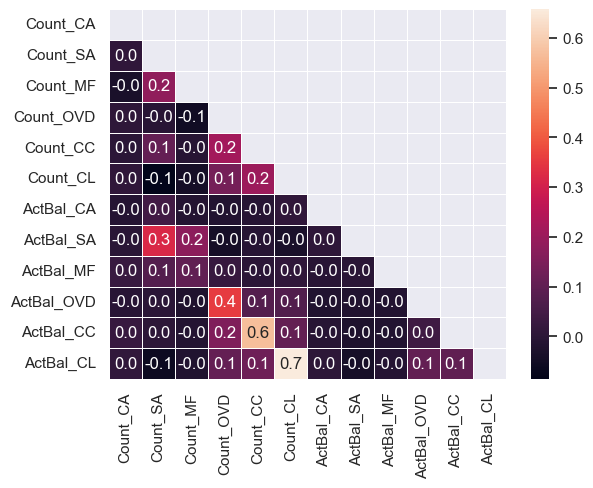

In [15]:
dmo_cor = dmo[products_act_bal].corr()

mask = np.triu(np.ones_like(dmo_cor))

sns.heatmap(dmo_cor, annot=True, fmt='.1f', linewidth=.5, mask=mask)

Looks fine. ActBal_CL and Count_CL are correlated the most(0.7). This is explained by the fact that the higher the number of live consumer loans, the higher actual consumer loan balance the client has. The correlation > 0.8 is considered strong. Therefore, the features will remain as they are for the further analysis.

#### 4.3 All features

<AxesSubplot:>

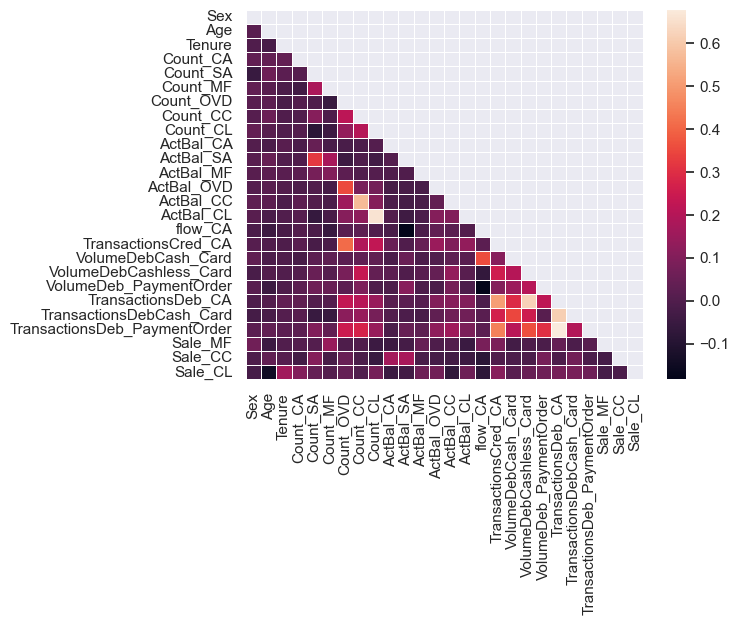

In [16]:
dmo_cor = dmo[soc_dem + products_act_bal + inflow_outflow + sales].corr()

mask = np.triu(np.ones_like(dmo_cor))

sns.heatmap(dmo_cor, annot=False, linewidth=.5, mask=mask, xticklabels=True, yticklabels=True)

Looks fine. Save the data and proceed with th e following analysis (notebook: 03_model.ipynb)

In [17]:
dmo_reduced = dmo[['Client'] + soc_dem + products_act_bal + inflow_outflow + sales + revenue]
dmo_reduced.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,flow_CA,TransactionsCred_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,0,51,7,1,0.0,0.0,1.0,0.0,0.0,1333.802857,0.000000,0.0,0.0,0.000000,0.000000,-16.921429,23.0,250.000000,283.089286,247.607143,30.0,3.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,2,1,43,152,1,1.0,0.0,0.0,0.0,0.0,110.768571,13326.190357,0.0,0.0,0.000000,0.000000,318.492857,3.0,307.142857,38.407143,35.714286,6.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,4,1,24,153,1,1.0,0.0,0.0,1.0,0.0,1599.840714,76.437143,0.0,0.0,1110.381786,0.000000,-1776.360714,4.0,714.285714,526.037500,1963.165357,36.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,58,200,1,1.0,0.0,0.0,0.0,0.0,5353.483929,8079.715714,0.0,0.0,0.000000,0.000000,-1067.634643,14.0,157.142857,832.175000,1779.571429,41.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,24,19,1,0.0,0.0,0.0,0.0,1.0,4.297143,0.000000,0.0,0.0,0.000000,1982.071071,18.750714,2.0,357.142857,0.000000,0.000000,6.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [18]:
dmo_reduced.to_csv("../data/dmo_reduced.csv", index = False, sep = ";")